In [97]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [98]:
admission = pd.read_csv(r"/Users/pangmoua/Admission_predict.csv")

In [99]:
admission.head(30)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [100]:
#data cleaning

In [101]:
admission.Research.dtypes

dtype('int64')

In [102]:
admission.isnull().sum()*100/admission.isnull().count()

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

No missing values!

In [103]:
admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [104]:
var_admin = admission.iloc[:,1:8]

In [105]:
lst=[]
for i in var_admin.columns:
    lst.append(admission[str(i)].nunique())
    

In [106]:
print(pd.DataFrame(lst))

     0
0   49
1   29
2    5
3    9
4    9
5  168
6    2


In [107]:
#loop

In [108]:
for col in var_admin:
    print(col)
    print(var_admin[col].unique().tolist())
    

GRE Score
[337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328, 307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310, 300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315, 301, 296, 294, 306, 305, 290, 335, 333, 297, 293]
TOEFL Score
[118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112, 105, 114, 116, 119, 120, 98, 93, 99, 97, 117, 113, 100, 95, 96, 94, 92]
University Rating
[4, 3, 2, 5, 1]
SOP
[4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]
LOR 
[4.5, 3.5, 2.5, 3.0, 4.0, 1.5, 2.0, 5.0, 1.0]
CGPA
[9.65, 8.87, 8.0, 8.67, 8.21, 9.34, 8.2, 7.9, 8.6, 8.4, 9.0, 9.1, 8.3, 8.7, 8.8, 8.5, 9.5, 9.7, 9.8, 9.6, 7.5, 7.2, 7.3, 8.1, 9.4, 9.2, 7.8, 7.7, 9.3, 8.85, 7.4, 7.6, 6.8, 8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9, 8.56, 8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76, 7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25, 8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62, 7.46, 7.28, 8.84, 9

In [109]:
admission.isna().sum()/len(admission)

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [110]:
#by hand 

In [111]:
admission[('GRE Score')].unique().tolist()

[337,
 324,
 316,
 322,
 314,
 330,
 321,
 308,
 302,
 323,
 325,
 327,
 328,
 307,
 311,
 317,
 319,
 318,
 303,
 312,
 334,
 336,
 340,
 298,
 295,
 310,
 300,
 338,
 331,
 320,
 299,
 304,
 313,
 332,
 326,
 329,
 339,
 309,
 315,
 301,
 296,
 294,
 306,
 305,
 290,
 335,
 333,
 297,
 293]

In [112]:
admission[('TOEFL Score')].unique().tolist()

[118,
 107,
 104,
 110,
 103,
 115,
 109,
 101,
 102,
 108,
 106,
 111,
 112,
 105,
 114,
 116,
 119,
 120,
 98,
 93,
 99,
 97,
 117,
 113,
 100,
 95,
 96,
 94,
 92]

In [113]:
admission[('University Rating')].unique().tolist()

[4, 3, 2, 5, 1]

In [114]:
admission[('SOP')].unique().tolist()

[4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]

In [115]:
admission[('LOR ')].unique().tolist()

[4.5, 3.5, 2.5, 3.0, 4.0, 1.5, 2.0, 5.0, 1.0]

In [116]:
admission[('Chance of Admit ')].unique().tolist()

[0.92,
 0.76,
 0.72,
 0.8,
 0.65,
 0.9,
 0.75,
 0.68,
 0.5,
 0.45,
 0.52,
 0.84,
 0.78,
 0.62,
 0.61,
 0.54,
 0.66,
 0.63,
 0.64,
 0.7,
 0.94,
 0.95,
 0.97,
 0.44,
 0.46,
 0.74,
 0.91,
 0.88,
 0.58,
 0.48,
 0.49,
 0.53,
 0.87,
 0.86,
 0.89,
 0.82,
 0.56,
 0.36,
 0.42,
 0.47,
 0.55,
 0.57,
 0.96,
 0.93,
 0.38,
 0.34,
 0.79,
 0.71,
 0.69,
 0.59,
 0.85,
 0.77,
 0.81,
 0.83,
 0.67,
 0.73,
 0.6,
 0.43,
 0.51,
 0.39]

No nan values

#GRE Scores ( out of 340 )
#TOEFL Scores ( out of 120 )
#University Rating ( out of 5 )
#Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
#Undergraduate GPA ( out of 10 )
#Research Experience ( either 0 or 1 )
#Chance of Admit ( ranging from 0 to 1 )

In [117]:
admission['CGPA'].dtypes

dtype('float64')

In [118]:
#EDA 

In [119]:
#univarite 

#How many variables do we have?
#How many datapoints are there in the dataset?
#Which variables are continuous and which are categorical?
#Are there any missing data? If so, how much?
#Do any of the variables have a known probability distribution (normal, Poisson, Gamma, etc.)?
#What are the central tendencies of each of the variables?
#How much variance is there in each of the variables?

In [120]:
admission.shape

(400, 9)

In [121]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [122]:
import scipy.stats as stats
from scipy.stats.mstats import winsorize

In [123]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [124]:
admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [125]:
#loop - ask Abdullah 

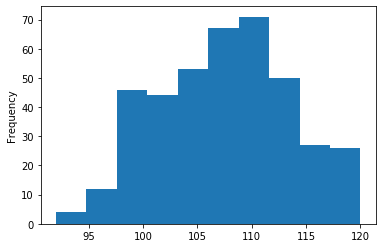

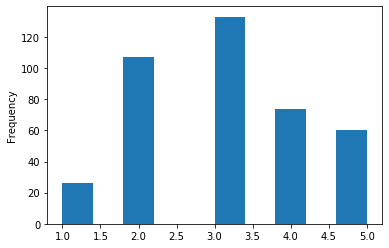

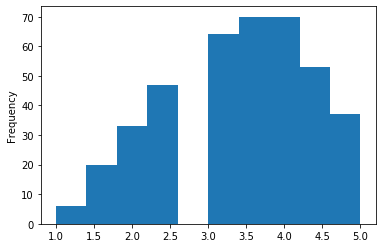

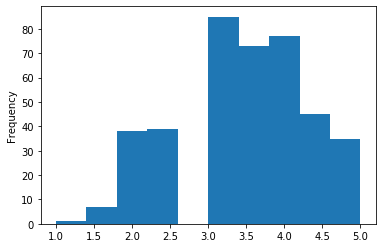

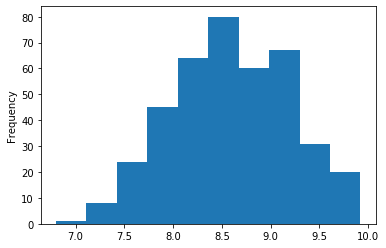

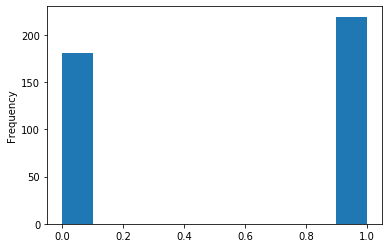

In [126]:
var_admin.set_index("GRE Score", inplace=True)
for col in var_admin.columns: 
    var_admin[col].plot.hist()
    plt.show()
    
    

In [127]:
admin = admission.iloc[:,1:]
#all the rows, starting from 1st column 
admin = pd.DataFrame(admin) 

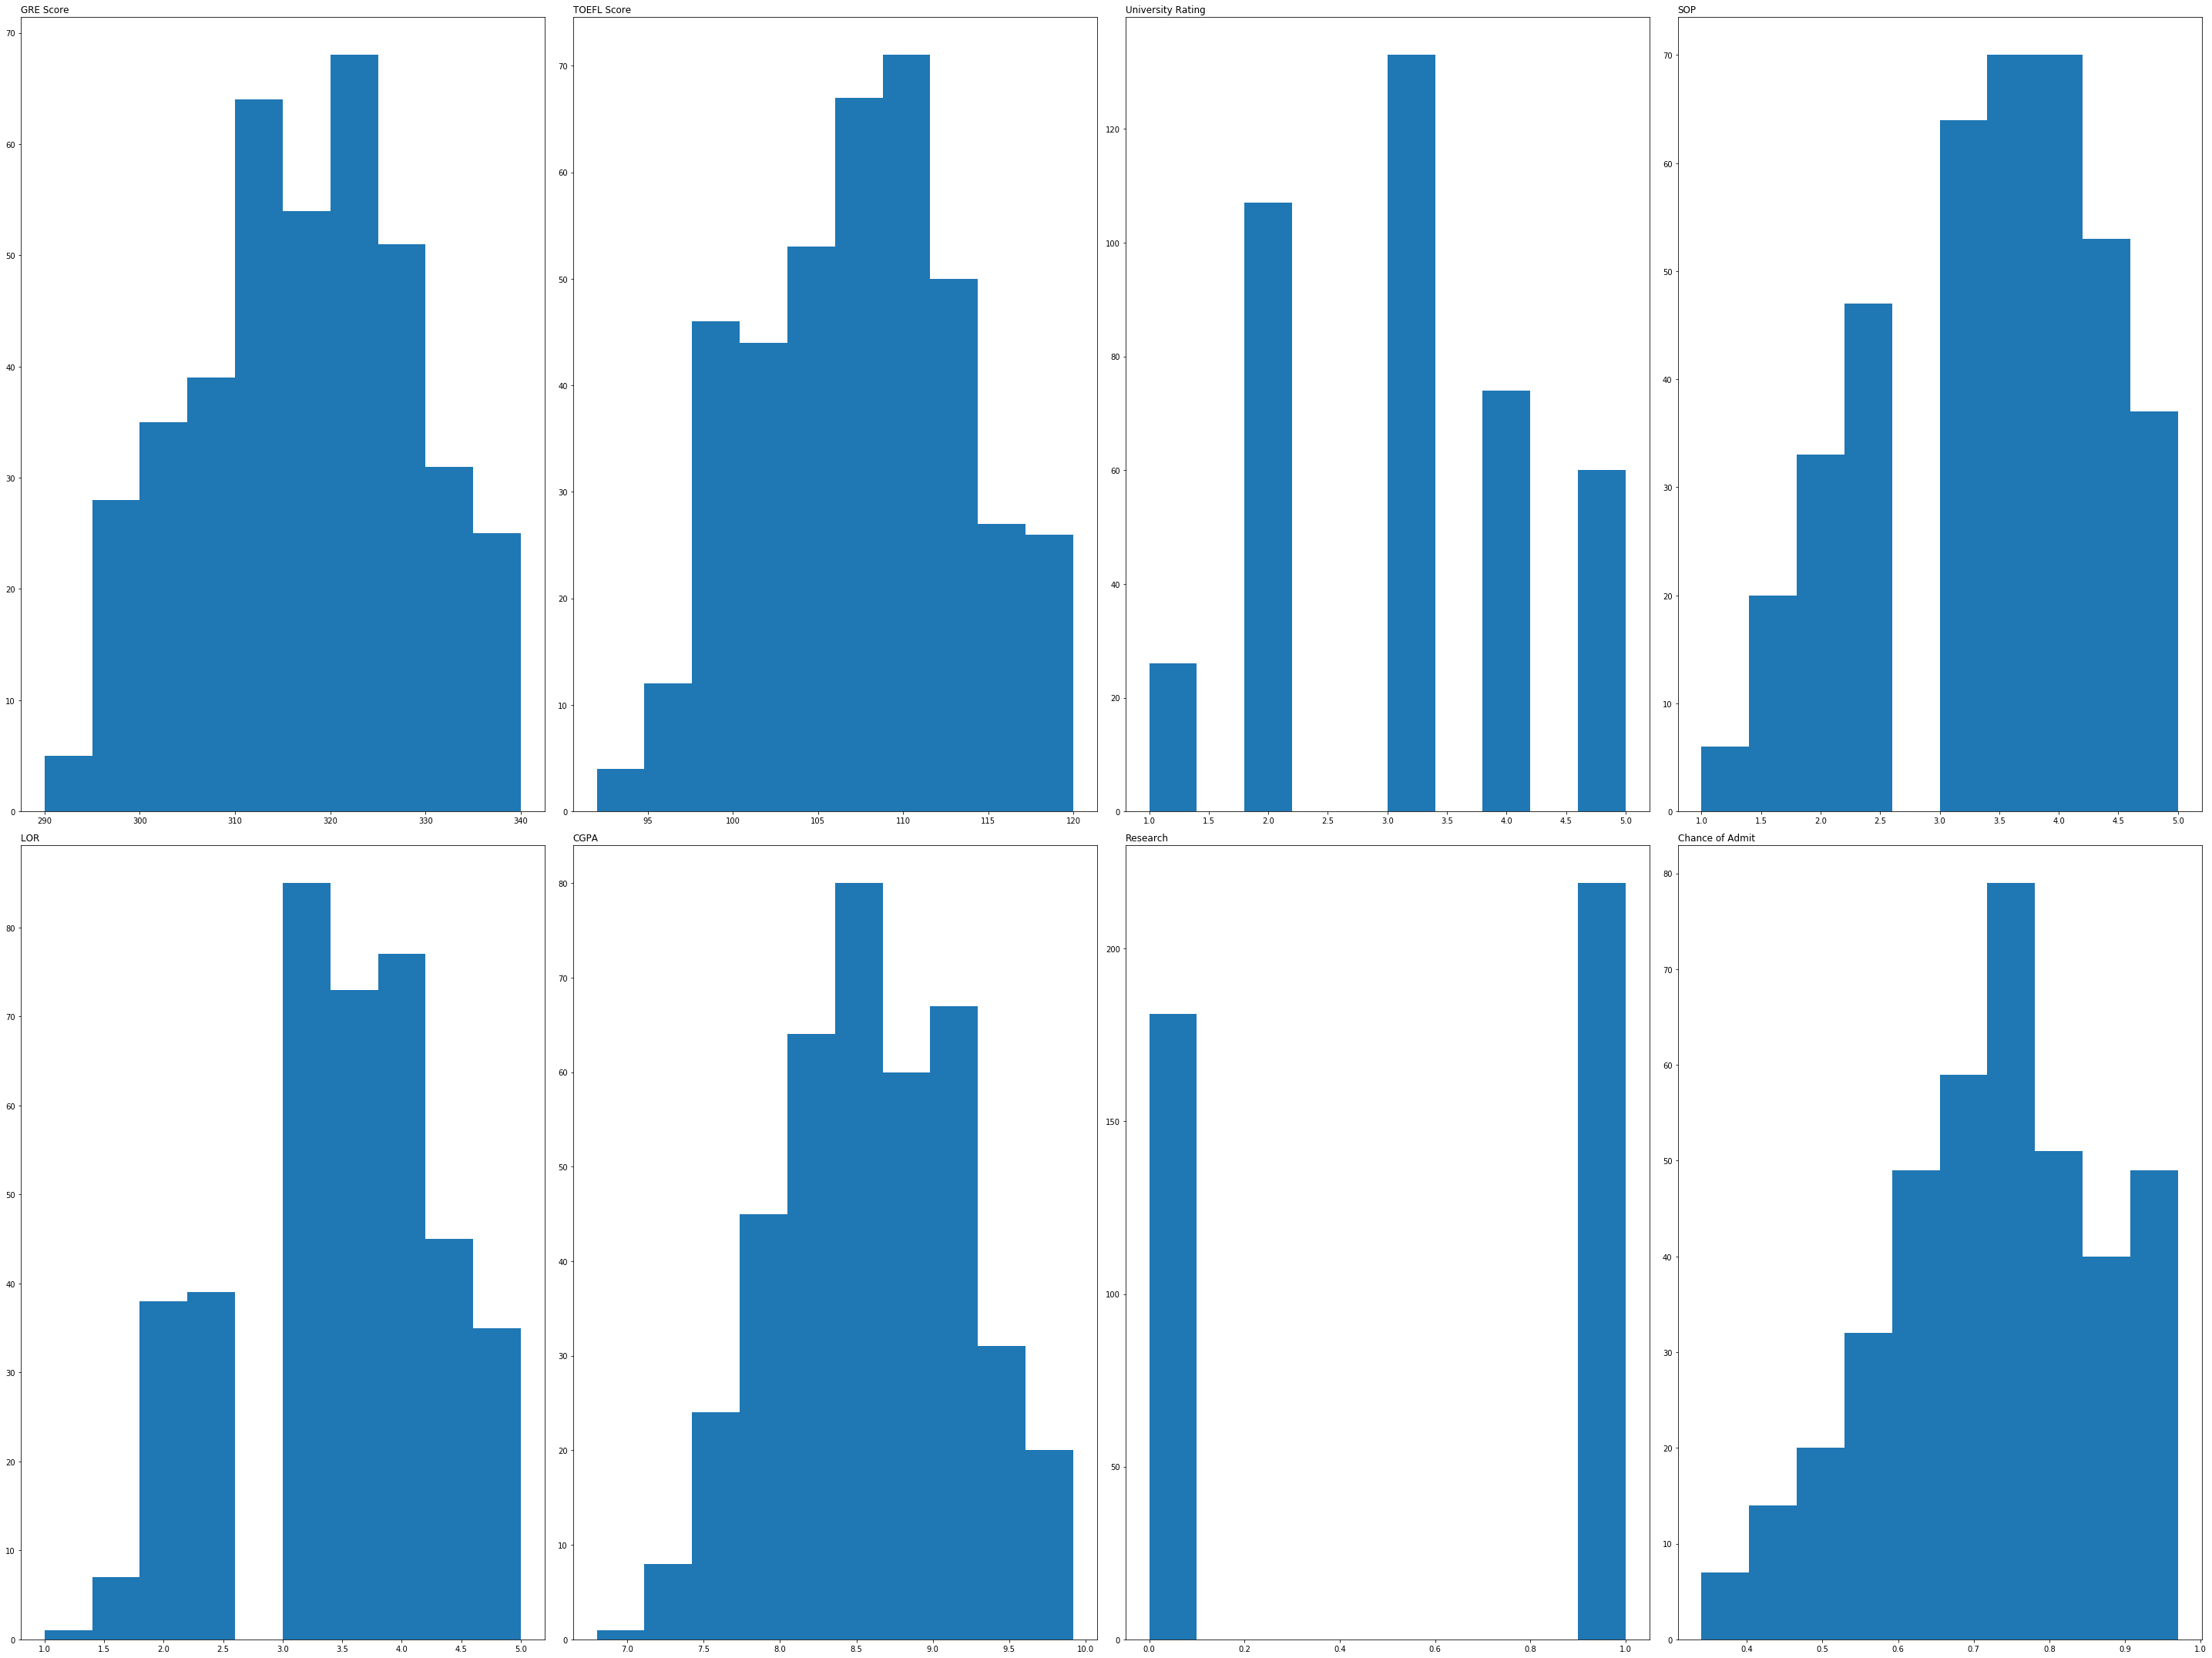

In [128]:
plt.figure(figsize=(40,30))
num=0
for i in admin.columns:
    num+=1
    plt.subplot(2,4, num)
    plt.tight_layout()
    plt.hist(admission[str(i)])
    plt.title(i, loc='left', fontsize=12, fontweight=0)
    plt.savefig('admin.png')

In [129]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [130]:
#by hand

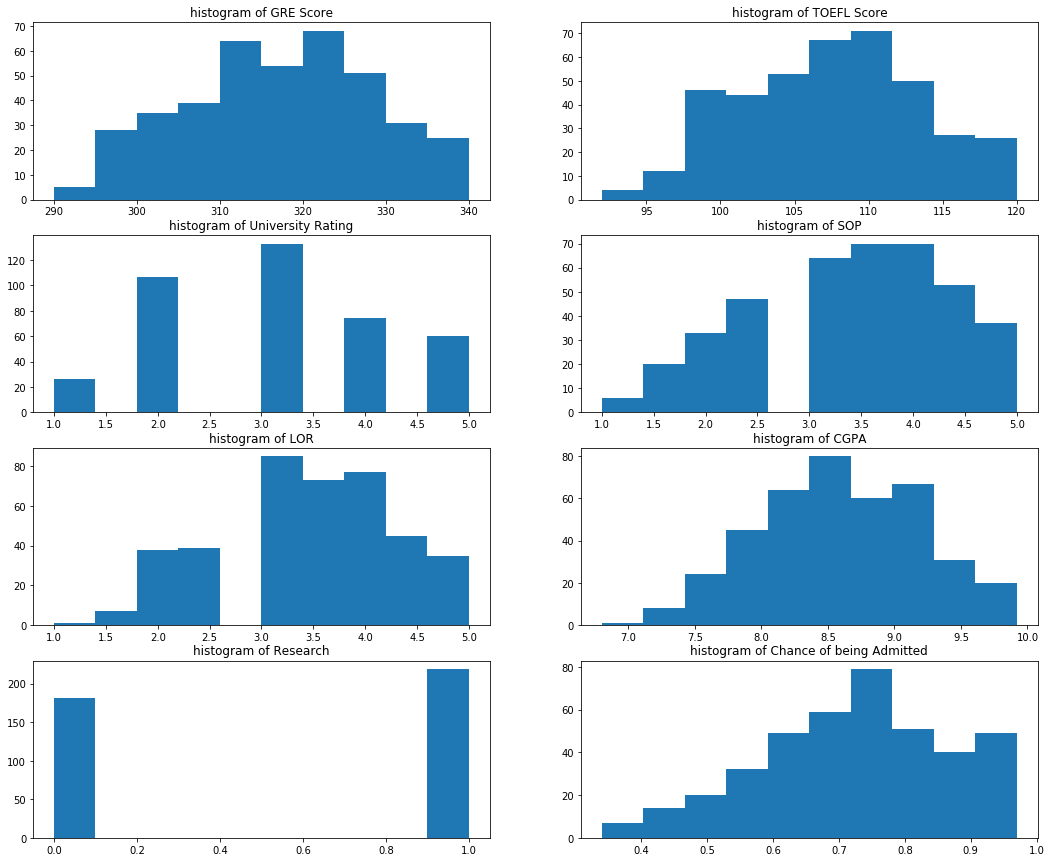

In [131]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(4, 2, 1)
plt.hist(admission["GRE Score"])
plt.title("histogram of GRE Score")

plt.subplot(4, 2, 2)
plt.hist(admission["TOEFL Score"])
plt.title("histogram of TOEFL Score")

plt.subplot(4, 2, 3)
plt.hist(admission["University Rating"])
plt.title("histogram of University Rating")

plt.subplot(4, 2, 4)
plt.hist(admission["SOP"])
plt.title("histogram of SOP")

plt.subplot(4, 2, 5)
plt.hist(admission["LOR "])
plt.title("histogram of LOR")

plt.subplot(4, 2, 6)
plt.hist(admission["CGPA"])
plt.title("histogram of CGPA")

plt.subplot(4, 2, 7)
plt.hist(admission["Research"])
plt.title("histogram of Research")


plt.subplot(4, 2, 8)
plt.hist(admission["Chance of Admit "])
plt.title("histogram of Chance of being Admitted")

plt.show()

In [132]:
#checking for outliers 

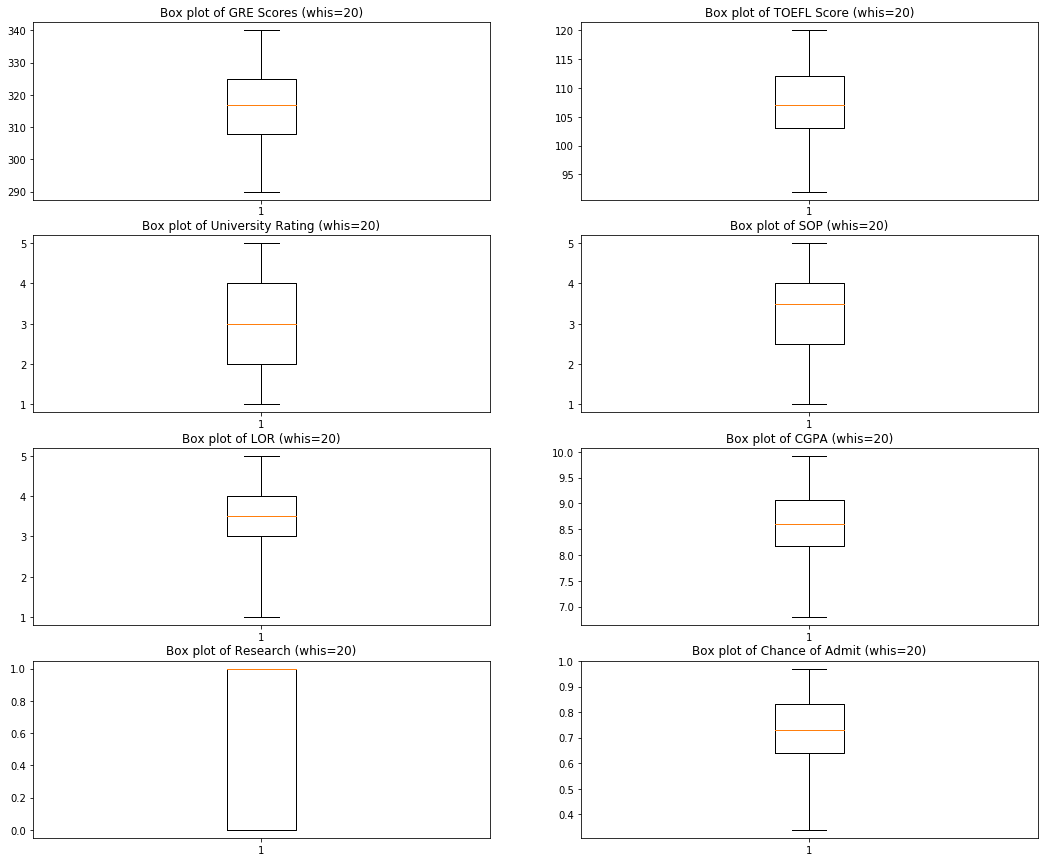

In [133]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(4, 2, 1)
plt.boxplot(admission["GRE Score"], whis=20)
plt.title("Box plot of GRE Scores (whis=20)")

plt.subplot(4, 2, 2)
plt.boxplot(admission["TOEFL Score"], whis=20)
plt.title("Box plot of TOEFL Score (whis=20)")

plt.subplot(4, 2, 3)
plt.boxplot(admission["University Rating"], whis=20)
plt.title("Box plot of University Rating (whis=20)")

plt.subplot(4, 2, 4)
plt.boxplot(admission["SOP"], whis=20)
plt.title("Box plot of SOP (whis=20)")

plt.subplot(4, 2, 5)
plt.boxplot(admission["LOR "], whis=20)
plt.title("Box plot of LOR (whis=20)")

plt.subplot(4, 2, 6)
plt.boxplot(admission["CGPA"], whis=20)
plt.title("Box plot of CGPA (whis=20)")

plt.subplot(4, 2, 7)
plt.boxplot(admission["Research"], whis=20)
plt.title("Box plot of Research (whis=20)")

plt.subplot(4, 2, 8)
plt.boxplot(admission["Chance of Admit "], whis=20)
plt.title("Box plot of Chance of Admit (whis=20)")

plt.show()

In [134]:
###Try loop for vis

In [135]:
#no outliers

In [136]:
#Bivariate analysis of two continuous variables

In [137]:
#Looking at Chance of Admission vs. all the other variables because I'm interested in using it as my Y variable 

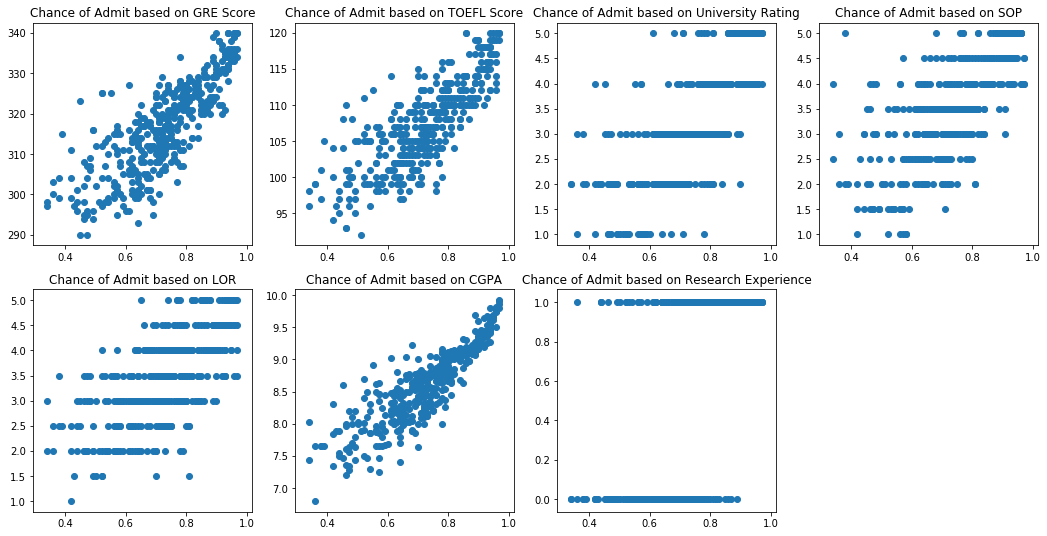

In [138]:
plt.figure(figsize=(18,9))

plt.subplot(2,4,1)
plt.scatter(admission["Chance of Admit "], admission["GRE Score"])
plt.title("Chance of Admit based on GRE Score")

plt.subplot(2,4,2)
plt.scatter(admission["Chance of Admit "], admission["TOEFL Score"])
plt.title("Chance of Admit based on TOEFL Score")

plt.subplot(2,4,3)
plt.scatter(admission["Chance of Admit "], admission["University Rating"])
plt.title("Chance of Admit based on University Rating")

plt.subplot(2,4,4)
plt.scatter(admission["Chance of Admit "], admission["SOP"])
plt.title("Chance of Admit based on SOP")

plt.subplot(2,4,5)
plt.scatter(admission["Chance of Admit "], admission["LOR "])
plt.title("Chance of Admit based on LOR")

plt.subplot(2,4,6)
plt.scatter(admission["Chance of Admit "], admission["CGPA"])
plt.title("Chance of Admit based on CGPA")

plt.subplot(2,4,7)
plt.scatter(admission["Chance of Admit "], admission["Research"])
plt.title("Chance of Admit based on Research Experience")

plt.show()

In [139]:
admission.drop(['Serial No.'], inplace=True, axis=1)

In [140]:
admission.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [141]:
#highly correlated independents: GRE Score, TOEFL Score, and CGPA 
#higher than .8 and lower than 1 indicates multicol between independent variables (CGPA-GRE Score)

In [142]:
corrmat_admission = admission.corr()

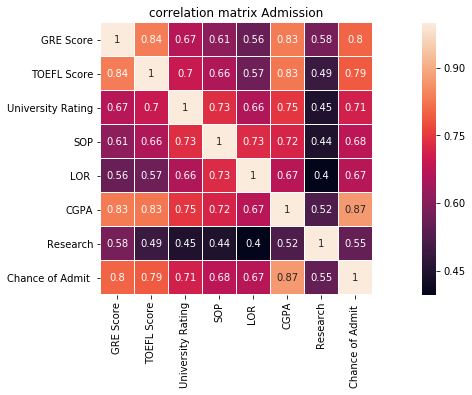

In [143]:
plt.figure(figsize=(18,5))

plt.subplot(1,1,1)
sns.heatmap(corrmat_admission, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix Admission")

plt.show()

when looking at correlation - look just at independent vs. independent, Test scores are highly correlated 

Among the highly correlated variables, I will use GPA anot not GRE score or TOELF because I think that GPAs are more likely to be universial

In [144]:
admission.drop(['GRE Score', 'TOEFL Score'], inplace=True, axis=1)

In [145]:
admission.describe()

,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Research Question - Often times, students are told to get good grades and get involved with extra curriculur in order to get into good schools. Does that hold true?

In [146]:
##linear, KNN(suffers from high dimesionality), decision tree & random forest 

I will use decision tree because it covers both classification and regression. 

In [147]:
from sklearn import tree

In [148]:
import pydotplus
import graphviz

In [149]:
from IPython.display import Image

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
feature_cols = ['University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

In [152]:
X = admission[feature_cols]

In [153]:
X

,University Rating,SOP,LOR,CGPA,Research
0,4,4.5,4.5,9.65,1
1,4,4.0,4.5,8.87,1
2,3,3.0,3.5,8.00,1
3,3,3.5,2.5,8.67,1
4,2,2.0,3.0,8.21,0
5,5,4.5,3.0,9.34,1
6,3,3.0,4.0,8.20,1
7,2,3.0,4.0,7.90,0
8,1,2.0,1.5,8.00,0
9,3,3.5,3.0,8.60,0


In [154]:
admission['Chance of Admit ']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
5      0.90
6      0.75
7      0.68
8      0.50
9      0.45
10     0.52
11     0.84
12     0.78
13     0.62
14     0.61
15     0.54
16     0.66
17     0.65
18     0.63
19     0.62
20     0.64
21     0.70
22     0.94
23     0.95
24     0.97
25     0.94
26     0.76
27     0.44
28     0.46
29     0.54
       ... 
370    0.72
371    0.89
372    0.95
373    0.79
374    0.39
375    0.38
376    0.34
377    0.47
378    0.56
379    0.71
380    0.78
381    0.73
382    0.82
383    0.62
384    0.96
385    0.96
386    0.46
387    0.53
388    0.49
389    0.76
390    0.64
391    0.71
392    0.84
393    0.77
394    0.89
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [155]:
target_col = ['Chance of Admit ']
Y = admission[target_col]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

chosen model - Decision Tree

In [157]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [159]:
#use classification - discrete 
#Decision tree, SVR or RF 
#in () play with different hyperparameters 
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [160]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = clf.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)


#Print admission, working with 2 decimals- {:.2f}
print("RMSE Value of the Decision Tree : {:.2f}".format(rmse_ka))

RMSE Value of the Decision Tree : 0.10


In [161]:
#lower RMSE value is better, measures deviation from true
#next step compare with other methods and play with parameters 

1st comparison

In [162]:
from sklearn.svm import SVR

In [163]:
X = X_test.sample(frac=0.3, replace=True, random_state=1)
Y = y_test.sample(frac=0.3, replace=True, random_state=1)
svr = SVR()
svr.fit(X, Y)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

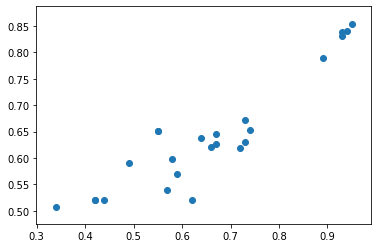

In [164]:
plt.scatter(Y, svr.predict(X))

In [165]:
svr.score(X, Y)

0.7513762362678854

In [166]:
from sklearn.model_selection import cross_val_score
chances = cross_val_score(svr, X, Y, cv=5)
chances

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account bet

array([ 0.53955194,  0.63009731, -0.71295025,  0.86886731, -0.53986498])

In [167]:
print("Accuracy: %0.2f (+/- %0.2f)" % (chances.mean(), chances.std() * 2))

Accuracy: 0.16 (+/- 1.30)


In [168]:
#very low accuracy 
#the mean chances and the 95% confidence interval of the score estimator are hence given by 

2nd comparison - Random forest

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [173]:
rfr = ensemble.RandomForestRegressor()
X = admission[feature_cols]
Y = admission[target_col]

In [175]:
chance_rf = cross_val_score(rfr, X, Y, cv=10)
chance_rf

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

array([0.74189437, 0.37387258, 0.69359266, 0.740157  , 0.66326084,
       0.87903388, 0.76200781, 0.73736313, 0.44530338, 0.79122657])

In [177]:
print("Accuracy: %0.2f (+/- %0.2f)" % (chance_rf.mean(), chance_rf.std() * 2))

Accuracy: 0.68 (+/- 0.30)
